# Clasificador de imágenes con Python

- Escoger una salida al seleccionar una categoría
- Convertir a blanco y negro cada pixel -> Mientras mas negro será 0, mientras más blanco será 1
- 28 x 28 píxeles

- Usar una función de activación para ajustar los pesos y los sesgos de las neuronas.

- Capas ocultas y funciones de activación

- ReLU -> Ayuda a encontrar resultados más interesantes

**Tipo de Red Neuronal**: Red Neuronal Densa -> Para convertirla en una convulasional.

## *Descripción de la Red Neuronal*
-Vamos a clasificar prendas de ropa, entre las cuales

1. Camiseta
2. Pantalón
3. Suéter
4. Vestido
5. Saco
6. Sandalia
7. Camisa
8. Tenis
9. Bolsa
10. Botín

## Datos Zalando

Usar 70.000 imágenes de la empresa Zalando de las que 60.000 serán para entrenar la red neuronal y 10.000 para las pruebas

El dataset está en este link [Zalando](https://www.tensorflow.org/datasets)

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised= True, with_info = True)

In [5]:
#Imprimir los metadatos
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

## Crear y manipular los datos

Hay 60.000 datos para entrenamiento y hay 10.000 datos para pruebas

In [6]:
#Dividir los datos de entrenamiento y los datos de prueba
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [7]:
#Buscar los nombres de las clases en el set
nombres_clases = metadatos.features['label'].names

nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Normalizar los datos -> Ponerles una escala para poder procesarlos

In [8]:
#Normalizar los datos pasar de 0-255 a 0-1

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Pasarlo de 255-0 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar los datos a cache, para hacer el entrenamiento más veloz
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()


Mostrar una imágen de los datos de pruebas, solo mostrar la primera

In [9]:
#Mostrar la primera imagen
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

imagen = imagen.numpy().reshape(28,28) #Redimensionar el tensor


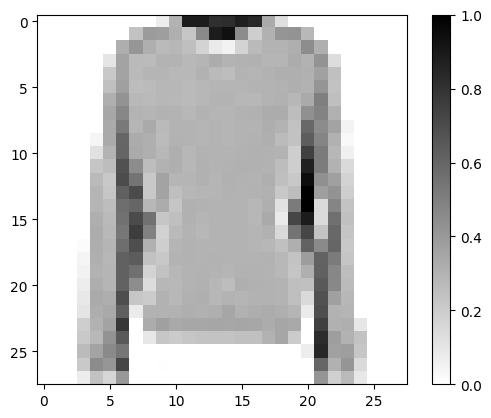

In [10]:
#Usamos matplotlib para graficar la foto
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Imprimir varias imágenes del conjunto de datos y mostrar la imagen correcta que viene etiquetada

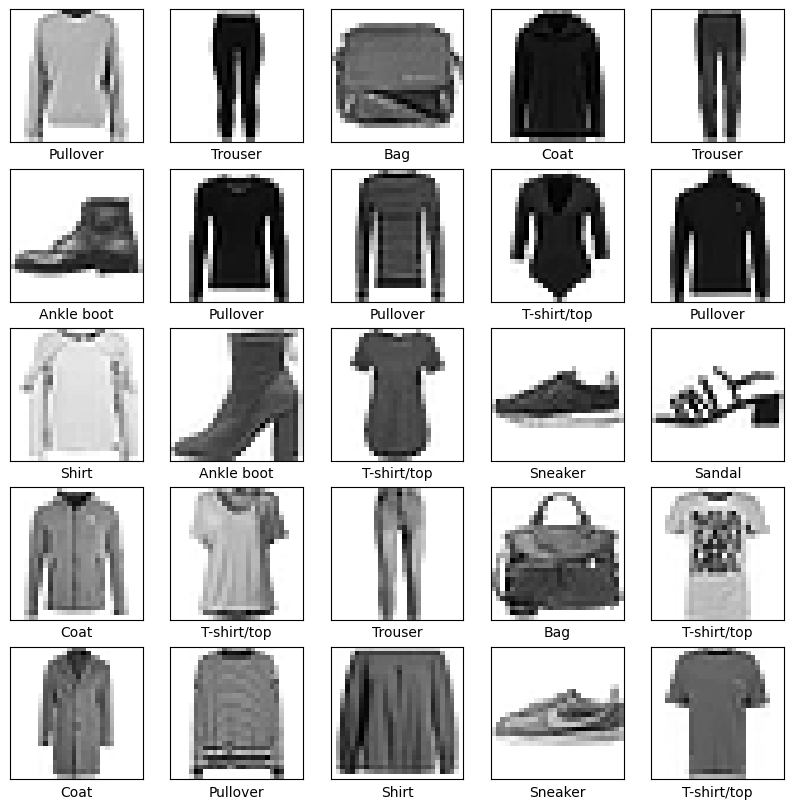

In [11]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape(28,28)
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])

plt.show()

## Crear el modelo de ML

Usaremos un modelo de tipo secuencial con una capa de entrada declarada de forma manual

In [12]:
#Crear el modelo

modelo = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #1 - Blanco y Negro -> Aplastar a una sola capa.
        tf.keras.layers.Dense(50, activation=tf.nn.relu),
        tf.keras.layers.Dense(50, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Capa de salida en las reglas de clasificación para que la salida sea 1
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Eliminar from_logits=True
    metrics=['accuracy']
)


In [14]:
#Definir los datos de entrenamiento y las pruebas
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [15]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [16]:
#Para entrenar redes neuronales grandes, se puede entrenar en lotes.
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


Entrenar el modelo 5 veces

In [17]:
import math

historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7560 - loss: 0.7058
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8620 - loss: 0.3906
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8734 - loss: 0.3516
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.3312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8834 - loss: 0.3151


## **Crear una Gráfica para ver el entrenamiento de los datos**

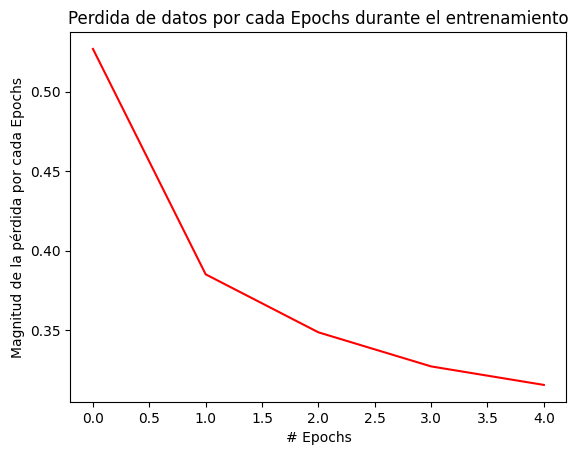

In [23]:
plt.title('Perdida de datos por cada Epochs durante el entrenamiento')
plt.xlabel('# Epochs')
plt.ylabel("Magnitud de la pérdida por cada Epochs")
plt.plot(historial.history["loss"], color='r')

La gráfica describe que mientras más epochs se hacen durante el entrenamiento menos datos se pierden y más preciso es el modelo

# Usar el modelo

- Se puede exportar y usar más conjuntos de datos para hacer predicciones
- Vamos a predecir el set de pruebas y que se intente predecir cada uno

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


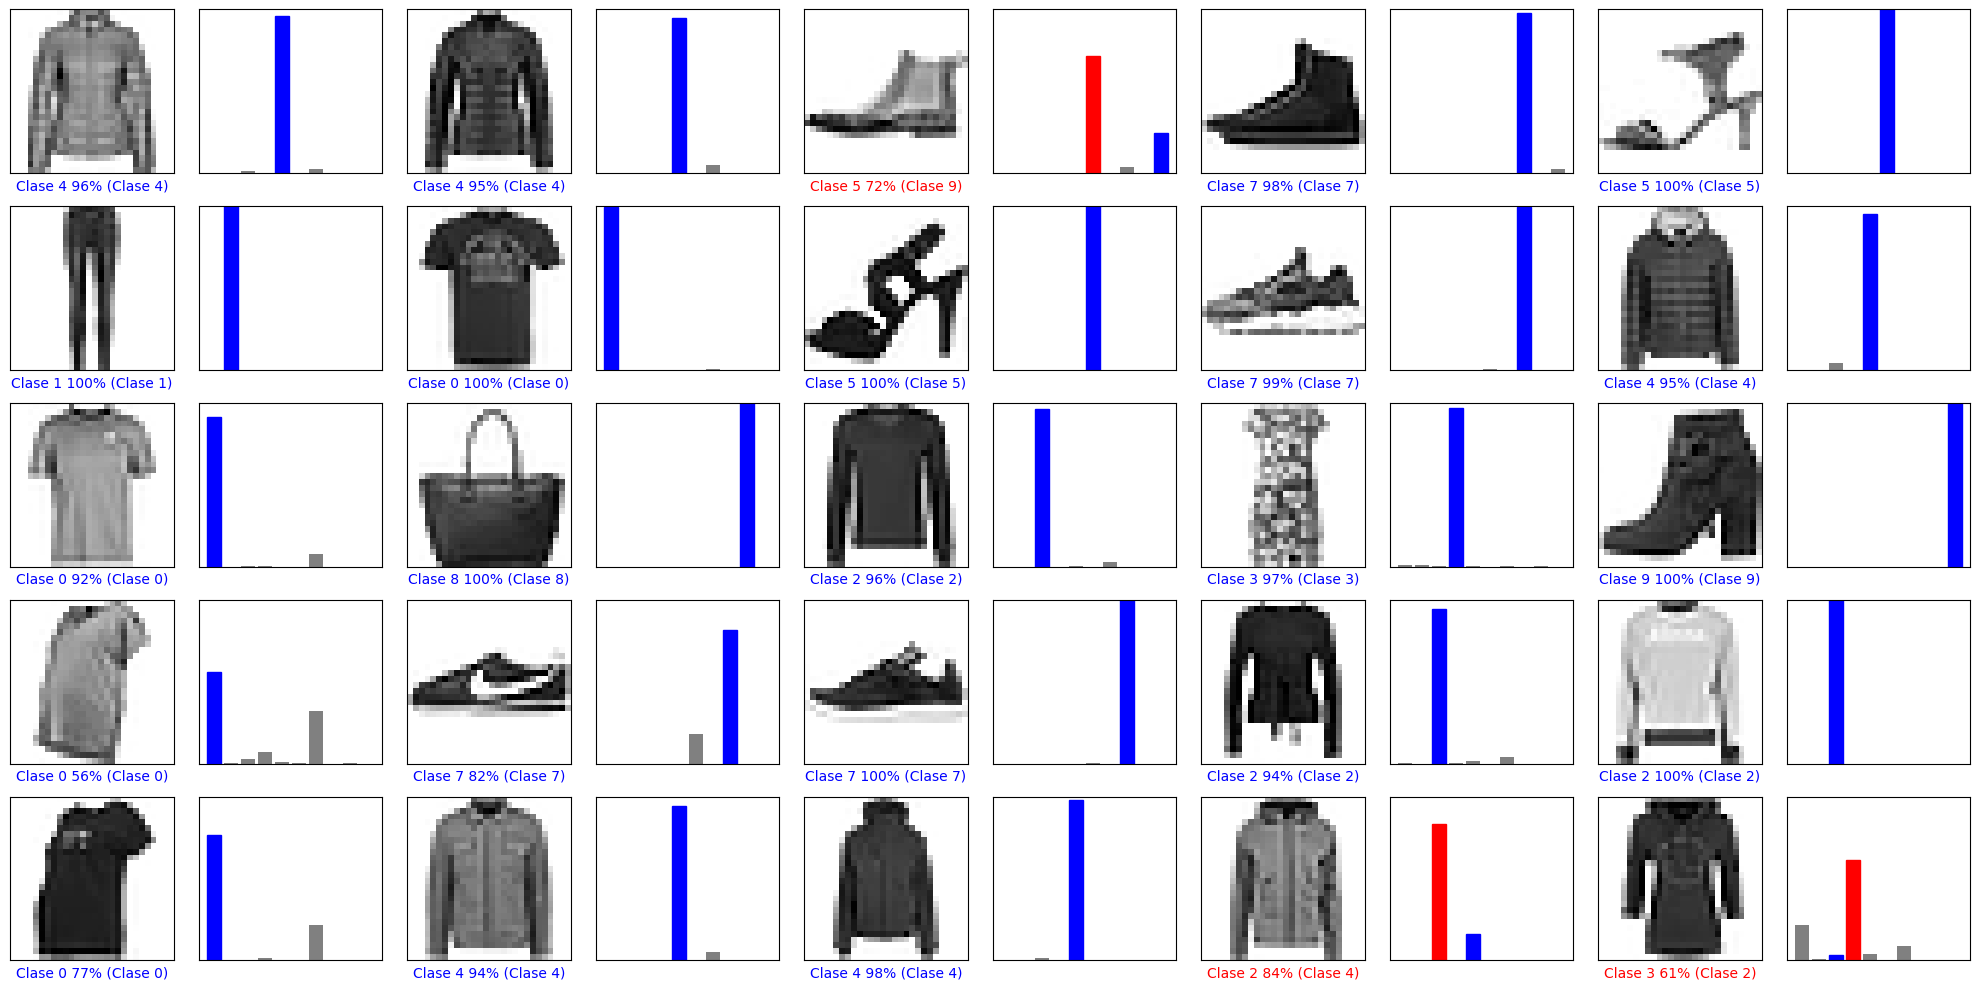

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes una lista de nombres de clases
nombres_clases = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4',
                  'Clase 5', 'Clase 6', 'Clase 7', 'Clase 8', 'Clase 9']

# Obtener imágenes y etiquetas de prueba
#Tomar un solo valor de prueba
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
    imagenes_prueba = imagenes_prueba.numpy()  # Convertir tensores a numpy
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

# Función para graficar una imagen con su predicción
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)  # Cambiar "camp" a "cmap" -> Problema de typo

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'  # Si la predicción es correcta
    else:
        color = 'red'  # Si la predicción es incorrecta

    plt.xlabel('{} {:2.0f}% ({})'.format(
        nombres_clases[etiqueta_prediccion],
        100 * np.max(arr_predicciones),
        nombres_clases[etiqueta_real]),
        color=color
    )

# Función para graficar los valores del arreglo de predicción
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    grafica = plt.bar(range(10), arr_predicciones, color='gray')  # Predicciones en color gris
    plt.ylim([0, 1])

    etiqueta_prediccion = np.argmax(arr_predicciones)
    grafica[etiqueta_prediccion].set_color('red')  # Predicción en rojo
    grafica[etiqueta_real].set_color('blue')  # Clase real en azul

# Visualizar imágenes y predicciones
filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))


#Se haran gráficas de barras para medir cada predicción
for i in range(num_imagenes):
    plt.subplot(filas, 2 * columnas, 2 * i + 1)
    graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
    plt.subplot(filas, 2 * columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()
